In [1]:
import pandas as pd

In [24]:
df=pd.read_csv("data_house.csv")

In [25]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df.head(7)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [28]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [33]:
df.date=le.fit_transform(df.date)

In [34]:
y=df.price

In [40]:
X=df.drop(["price"], axis = 1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.30, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)

In [46]:
X_test=scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [50]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [53]:
mse=cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [54]:
np.mean(mse)

-39442431415.44475

In [56]:
reg_pred=reg.predict(X_test)
reg_pred

array([ 446201.00477883,  729747.35812894, 1222655.61631229, ...,
        371176.44281682,  804801.14498603,  583234.5459304 ])

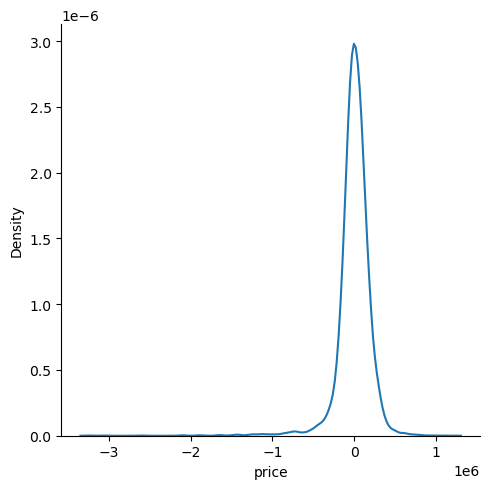

In [59]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [61]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.5527564975037306